### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd

df_2018 = pd.read_excel('/content/2018.xlsx')
df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [3]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [4]:
df_2018['국가명'] = df_2018['COUNTRY']

In [5]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

# 정책관련

목표 : 정책별로 타겟 국가에서 어떤 변화가 있었는지를 재방문율·행동특성·지출/체험 데이터로 검증하여
**유의미한 정책 효과와 비효과 요인을 분리**해내려함.

| 연도        | 정책/전략명                           | 주요 내용 요약                              | 출처| 대표 타겟 국가|
| --------- | -------------------------------- | ------------------------------------- | ------------------------------------------------------------------------------------ |-----|
| 2020–2022 | **Feel the Rhythm of Korea 캠페인** | K-팝·전통음악 융합 글로벌 영상 마케팅 (유튜브 2억+ 조회)   | [HS Ad 기사](https://www.hsad.co.kr/pr/media_view.asp?seq=593)   |      동남아(인도네시아 등), 미국, 유럽 일부<br>(K-pop 특성 및 영상 조회 기반 추론)                |
| 2021      | **K-ETA 도입 (전자여행허가제)**           | 외국인 입국 간소화, 일부 국가 면제 적용               | [K-ETA 공식](https://www.k-eta.go.kr/portal/apply/viewstep1.do)   |모든 비자면제 50국가                     |
| 2023–2024 | **Visit Korea Year 2023–2024**   | 로드쇼, K-컬처 관광행사, 콘서트 중심 프로모션           | [방한의 해 소개](https://www.vkc.or.kr/ko/year/visitKoreaYear.asp)                         |중국, 일본, 미국, 아시아 신흥국
| 2022\~    | **K-뷰티/쇼핑 그랜드세일**                | 대규모 쇼핑할인행사, 숙박·항공·뷰티 연계 혜택 제공         | [Korea Grand Sale](https://www.koreagrandsale.co.kr/)                                |중국, 일본, 대만, 동남아
| 2021\~24  | **지역문화·한류 연계 콘텐츠 개발**            | 생태관광/전통문화/한류 융합 테마 확대, 지방 한류도시 연계     | [Korea.net 보도](https://www.korea.net/NewsFocus/Culture/view?articleId=205250)        |
| 2023      | **외래관광객 유치 목표 발표**               | 2024년 2천만 명, 2027년 3천만 명 유치 목표 공식 선언  | [문체부 보도](https://www.mcst.go.kr/kor/s_notice/press/pressView.jsp?pSeq=19954)         |
| 2022\~    | **고부가가치·지속가능 관광 정책**             | 고소득 고객 타깃, 생태·로컬 연계 관광, 저탄소 친환경 정책 추진 | [Invest Korea](https://www.investkorea.org/ik-en/bbs/i-2739/detail.do?ntt_sn=491089) |서구권 고소득층, 장기체류자


### 1. Feel the Rhythm of Korea 캠페인

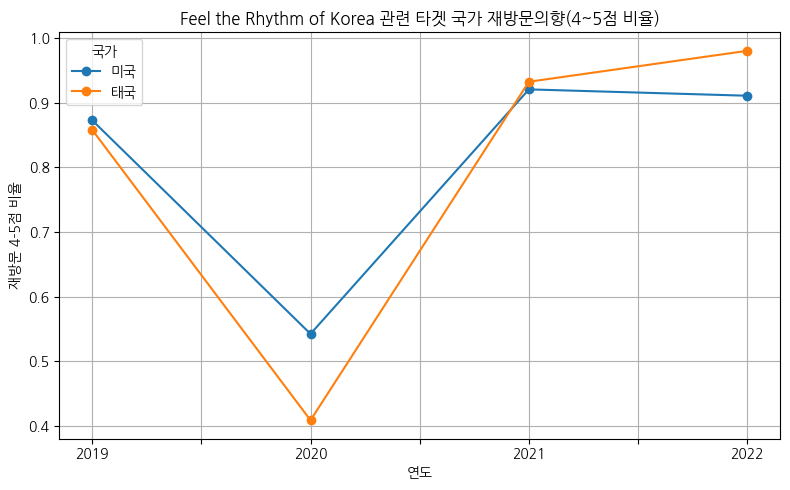

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 국가 코드 매핑 (간소화 버전)
country_map = {
    1: '일본', 2: '중국', 3: '홍콩', 4: '싱가포르', 5: '대만',
    6: '태국', 7: '말레이시아', 8: '호주', 9: '미국', 10: '캐나다'
}

# [2] 국가명 컬럼 추가
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)

# [3] 재방문의향 컬럼 표준화
df_2019['재방문의향'] = df_2019['Q16']
df_2020['재방문의향'] = df_2020['Q6_1']
df_2021['재방문의향'] = df_2021['Q8']
df_2022['재방문의향'] = df_2022['Q8']

# [4] 타겟 국가 필터링 (미국, 태국)
target_countries = ['미국', '태국']

# [5] 연도별 재방문율(4~5점 비율) 계산 함수
def revisit_rate(df):
    df_filtered = df[df['국가명'].isin(target_countries)].copy()
    df_filtered['high_revisit'] = df_filtered['재방문의향'] >= 4
    return df_filtered.groupby('국가명')['high_revisit'].mean()

# [6] 각 연도 재방문율(4~5점 비율) 계산
revisit_2019 = revisit_rate(df_2019).rename('2019')
revisit_2020 = revisit_rate(df_2020).rename('2020')
revisit_2021 = revisit_rate(df_2021).rename('2021')
revisit_2022 = revisit_rate(df_2022).rename('2022')

# [7] 합치기
revisit_trend = pd.concat([revisit_2019, revisit_2020, revisit_2021, revisit_2022], axis=1)

# [8] 시각화
revisit_trend.T.plot(marker='o', figsize=(8, 5))
plt.title("Feel the Rhythm of Korea 관련 타겟 국가 재방문의향(4~5점 비율)")
plt.xlabel("연도")
plt.ylabel("재방문 4-5점 비율")
plt.grid(True)
plt.legend(title="국가")
plt.tight_layout()
plt.show()

- 코로나 시기 표시 추가 버전

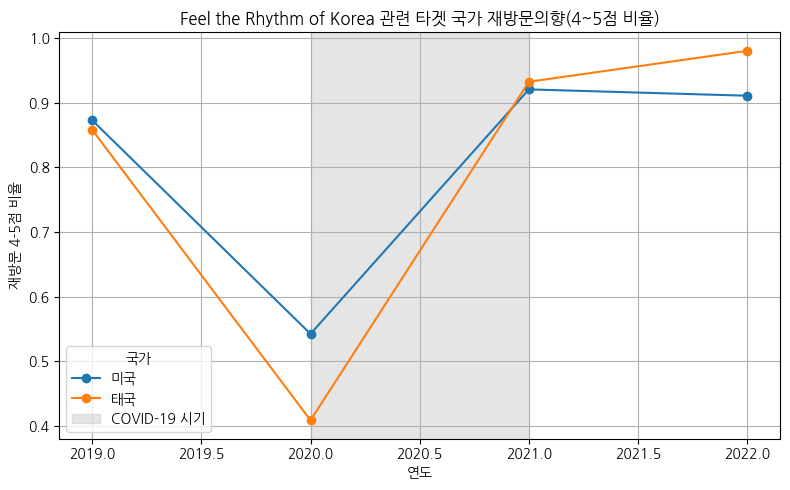

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 국가 코드 매핑 (간소화 버전)
country_map = {
    1: '일본', 2: '중국', 3: '홍콩', 4: '싱가포르', 5: '대만',
    6: '태국', 7: '말레이시아', 8: '호주', 9: '미국', 10: '캐나다'
}

# [2] 국가명 컬럼 추가
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)

# [3] 재방문의향 컬럼 표준화
df_2019['재방문의향'] = df_2019['Q16']
df_2020['재방문의향'] = df_2020['Q6_1']
df_2021['재방문의향'] = df_2021['Q8']
df_2022['재방문의향'] = df_2022['Q8']

# [4] 타겟 국가 필터링 (미국, 태국)
target_countries = ['미국', '태국']

# [5] 연도별 재방문율(4~5점 비율) 계산 함수
def revisit_rate(df):
    df_filtered = df[df['국가명'].isin(target_countries)].copy()
    df_filtered['high_revisit'] = df_filtered['재방문의향'] >= 4
    return df_filtered.groupby('국가명')['high_revisit'].mean()

# [6] 각 연도 재방문율(4~5점 비율) 계산
revisit_2019 = revisit_rate(df_2019).rename('2019')
revisit_2020 = revisit_rate(df_2020).rename('2020')
revisit_2021 = revisit_rate(df_2021).rename('2021')
revisit_2022 = revisit_rate(df_2022).rename('2022')

# [7] 합치기
revisit_trend = pd.concat([revisit_2019, revisit_2020, revisit_2021, revisit_2022], axis=1)

# [7.5] x축 연도 숫자 리스트로 바꿔서 index 설정
revisit_trend_T = revisit_trend.T.copy()
revisit_trend_T.index = revisit_trend_T.index.astype(int)

# 시각화
ax = revisit_trend_T.plot(marker='o', figsize=(8, 5))
plt.title("Feel the Rhythm of Korea 관련 타겟 국가 재방문의향(4~5점 비율)")
plt.xlabel("연도")
plt.ylabel("재방문 4-5점 비율")
plt.grid(True)

# 코로나 시기 정확히 숫자로 음영 표시
plt.axvspan(2020, 2021, color='gray', alpha=0.2, label='COVID-19 시기')

# 범례
plt.legend(title="국가")
plt.tight_layout()
plt.show()

## 전체 방문자 수 추이

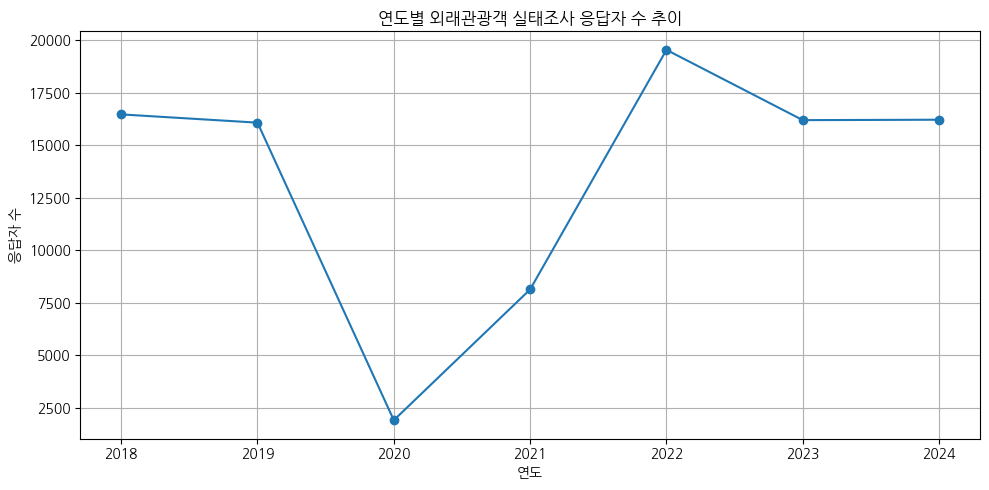

In [10]:
# 각 연도별 응답자 수 계산
visitor_counts = {
    '2018': len(df_2018),
    '2019': len(df_2019),
    '2020': len(df_2020),
    '2021': len(df_2021),
    '2022': len(df_2022),
    '2023': len(df_2023),
    '2024': len(df_2024)
}

# 시각화
years = list(visitor_counts.keys())
counts = list(visitor_counts.values())

plt.figure(figsize=(10, 5))
plt.plot(years, counts, marker='o')
plt.title('연도별 외래관광객 실태조사 응답자 수 추이')
plt.xlabel('연도')
plt.ylabel('응답자 수')
plt.grid(True)
plt.tight_layout()
plt.show()

한국 방문 선택 시 고려요인 or 주요 참여 활동 중 어떤걸 고려해야할지 고민

우선,

“한류 정책이 실제 방문 결정을 유도했는가?”가 주 목적이니 **한국 방문 고려 요인** 선택

## 한국 방문 고려요인이나 관심계기 한류 비율

- 2019 :  Q5_2A1 - Q5_2A3 에서 값이 6, (고려요인)

- 2020 :  Q2_2A1 - Q2_2A3 에서 값이 6, (고려요인)

- 2021 : Q3B1 - Q3B3 에서 값이 6,(고려요인)

- 2022 : Q3B1 - Q3B3 에서 값이 6,(고려요인)

- 2023 : Q1_1a1 - Q1_1a3 에서 값이 7,(관심계기)

- 2024 : Q1_1a1 - Q1_1a3 에서 값이 7(관심계기)

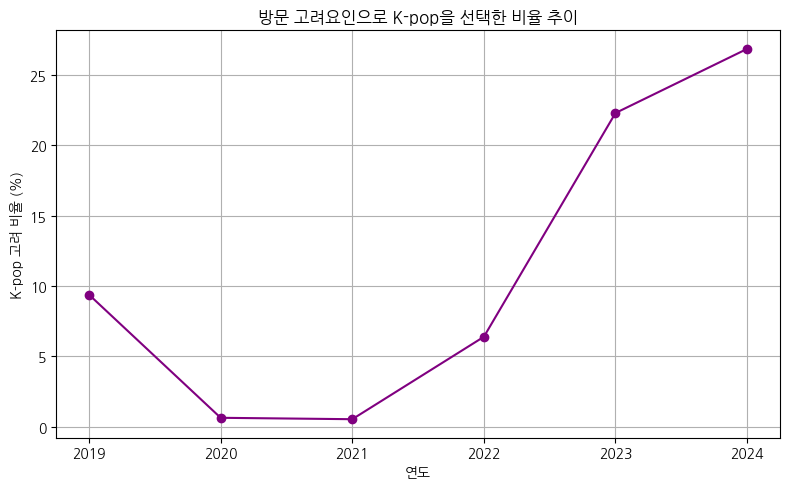

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 연도별 분석 함수
def calc_kpop_ratio(df, cols, kpop_code):
    is_kpop = df[cols].isin([kpop_code]).any(axis=1)
    return is_kpop.sum() / len(df)

# [2] 각 연도별 비율 계산
kpop_ratio = {
    '2019': calc_kpop_ratio(df_2019, ['Q5_2A1', 'Q5_2A2', 'Q5_2A3'], 6),
    '2020': calc_kpop_ratio(df_2020, ['Q2_2A1', 'Q2_2A2', 'Q2_2A3'], 6),
    '2021': calc_kpop_ratio(df_2021, ['Q3B1', 'Q3B2', 'Q3B3'], 6),
    '2022': calc_kpop_ratio(df_2022, ['Q3B1', 'Q3B2', 'Q3B3'], 6),
    '2023': calc_kpop_ratio(df_2023, ['Q1_1a1', 'Q1_1a2', 'Q1_1a3'], 7),
    '2024': calc_kpop_ratio(df_2024, ['Q1_1a1', 'Q1_1a2', 'Q1_1a3'], 7)
}

# [3] 시각화
years = list(kpop_ratio.keys())
ratios = [round(kpop_ratio[y] * 100, 2) for y in years]

plt.figure(figsize=(8, 5))
plt.plot(years, ratios, marker='o', color='purple')
plt.title('방문 고려요인으로 K-pop을 선택한 비율 추이')
plt.xlabel('연도')
plt.ylabel('K-pop 고려 비율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

‣ 코로나 시기와 맞물려 바로 효과가 나타나는 것을 확인하기 어려움

| 구간            | 의미                                    |
| ------------- | ------------------------------------- |
| **2019**      | 코로나 전 기준선                             |
| **2020–2021** | 외부 요인(팬데믹 충격)으로 정책 효과 분리 불가능          |
| **2022**      | 회복기: 방문 가능해지며 **의향이 행동으로 전환**되기 시작    |
| **2023**      | 본격적 입국 확대 + 한류 기반 캠페인 효과 확인 가능        |
| **2024**      | 지속 효과 및 Visit Korea Year 정책 중첩 가능성 있음 |


- Feel the Rhythm 타겟 국가 고려항목에서 K-POP 비율 확인

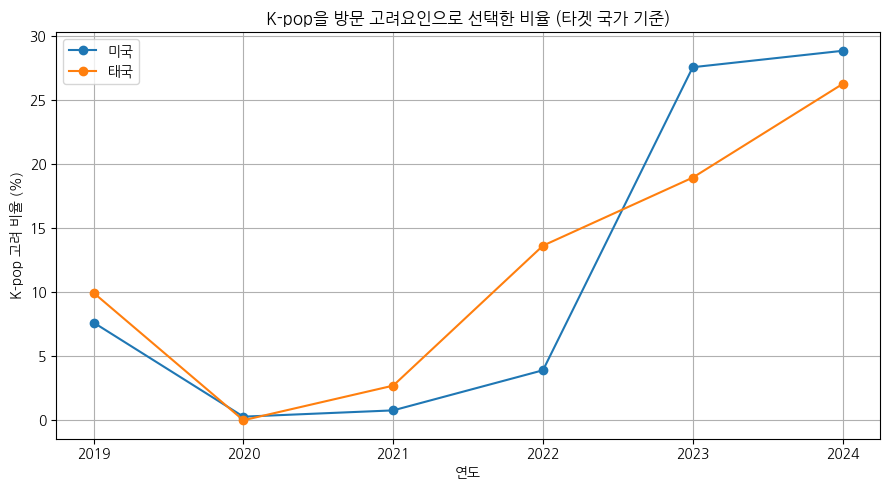

In [14]:
# [1] 타겟 국가 리스트
target_countries = ['미국', '태국']

# [2] 특정 국가에 대해 K-pop 고려 비율 계산 함수
def kpop_ratio_by_country(df, cols, kpop_code, country):
    df_country = df[df['국가명'] == country]
    is_kpop = df_country[cols].isin([kpop_code]).any(axis=1)
    return is_kpop.sum() / len(df_country) if len(df_country) > 0 else None

# [3] 연도별 국가별 K-pop 고려 비율 저장
kpop_ratios = {'미국': {}, '태국': {}}

# [4] 각 연도 반복
for year, (df, cols, code) in {
    '2019': (df_2019, ['Q5_2A1', 'Q5_2A2', 'Q5_2A3'], 6),
    '2020': (df_2020, ['Q2_2A1', 'Q2_2A2', 'Q2_2A3'], 6),
    '2021': (df_2021, ['Q3B1', 'Q3B2', 'Q3B3'], 6),
    '2022': (df_2022, ['Q3B1', 'Q3B2', 'Q3B3'], 6),
    '2023': (df_2023, ['Q1_1a1', 'Q1_1a2', 'Q1_1a3'], 7),
    '2024': (df_2024, ['Q1_1a1', 'Q1_1a2', 'Q1_1a3'], 7),
}.items():
    for country in target_countries:
        ratio = kpop_ratio_by_country(df, cols, code, country)
        kpop_ratios[country][year] = round(ratio * 100, 2) if ratio is not None else None

# [5] 시각화
plt.figure(figsize=(9, 5))
for country in target_countries:
    years = list(kpop_ratios[country].keys())
    values = list(kpop_ratios[country].values())
    plt.plot(years, values, marker='o', label=country)

plt.title("K-pop을 방문 고려요인으로 선택한 비율 (타겟 국가 기준)")
plt.xlabel("연도")
plt.ylabel("K-pop 고려 비율 (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

| 연도        | 미국             | 태국             | 해석                                |
| --------- | -------------- | -------------- | --------------------------------- |
| 2019      | 낮음 (\~8%)      | 비교적 높음 (\~10%) | 정책 시행 전: 미국보다 태국의 K-pop 관심이 다소 높음 |
| 2020–2021 | 거의 0%          | 거의 0%          | 코로나로 여행 고려 자체 감소 + 조사 설계 영향 가능성   |
| **2022**  | 소폭 회복          | 점진적 회복         | 입국 제한 완화, 인식 전환 시작                |
| **2023**  | **급등 (\~28%)** | 증가 (\~19%)     | 정책 도달 본격화 시기 → **행동 전환 기점**       |
| **2024**  | 유지 (\~29%)     | 계속 증가 (\~26%)  | 미국은 정체 또는 포화, 태국은 지속 확대           |


► FTRK의 정책 효과가 타겟 국가별로 시차를 두고 나타났으며,
2023년 이후에 재방문의향 및 실제 고려 비율로 확산되었음을 확인 가능

--------------------------------------------------

# FEEL THE RHYTHM 캠페인은 언제 시작되었는가

1. 초기 캠페인 (K-pop 없이 전통/퓨전 중심)

   서울 편 (2020년 7월 29일 공개) - 유튜브 기준 5000만회 이상 조회
  
   이외에도 같은 날 부산, 전주, 2020년 10월 안동/목포/강릉, 2021년 3월 인천 등 전국 각지 시리즈가 연이어 공개되었음.

2. K-pop 아티스트 참여 – BTS 시리즈 (2022년) - 유튜브 기준 모두 1억회를 넘김

  [Busan Blues – Jimin & Suga](https://www.youtube.com/watch?v=NLxgGRElMbs&t=98s) : 2022. 10. 20

  [Daejeon Rock N Roll](https://www.youtube.com/watch?v=-0LHggNGP4A) : 2022. 10. 20

  [Pohang Hiphop](https://www.youtube.com/watch?v=pH9g3vdoOeg) : 2022. 10. 27

  [Jeju Jazz](https://www.youtube.com/watch?v=gux_pyEIcUY&t=1s) : 2022. 11. 8

* 기사

[BTS가 입대해 있을 때 인데도 뜨거운 관심을 받았다는 기사](https://m.korean-vibe.com/news/newsview.php?ncode=1065579412401619&utm_source=chatgpt.com)

## 참여한 활동과 만족한 활동에서의 K-POP 비율 체크

1. 주요 참여 활동 (다중 선택 가능)

- 2019: Q9_1A1 ~ Q9_1A20 → 값: 7

- 2020: Q7A01 ~ Q7A12 → 값: 7

- 2021: Q4A01 ~ Q4A17 → 값: 7

- 2022: Q4A01 ~ Q4A17 → 값: 7

- 2023: Q8a01~ Q8a19 → 값: 7

- 2024: Q8a01~ Q8a20  → 값: 8

2. 가장 만족한 활동 (1~3개 선택)

- 2019: Q9_2A1 ~ Q9_2A3 → 값: 7

- 2020: 없음

- 2021: 없음

- 2022: Q4B1~Q4B3 → 값: 7

- 2023: Q8_1a1 ~ Q8_1a3 → 값: 7

- 2024: Q8_1a1 ~ Q8_1a3 → 값: 8



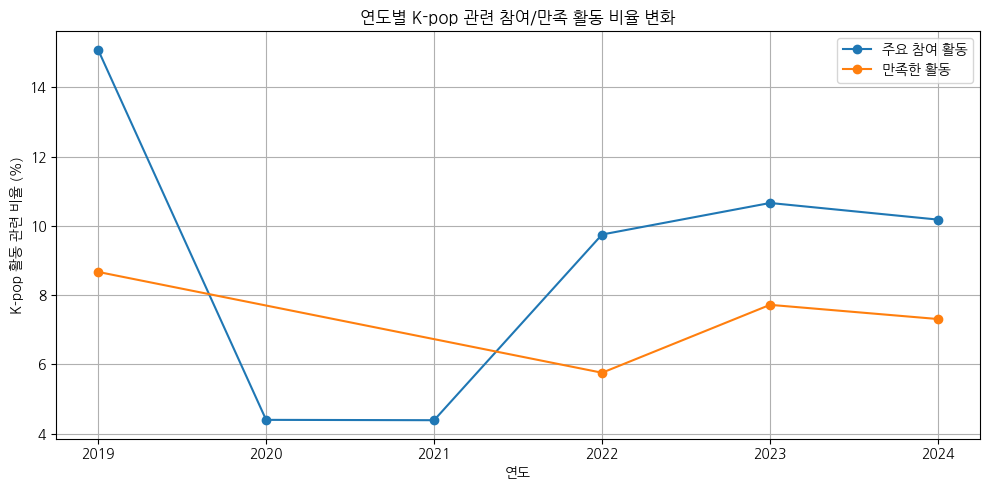

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. K-pop 코드 비율 계산 함수
def calc_ratio(df, cols, kpop_code):
    is_kpop = df[cols].isin([kpop_code]).any(axis=1)
    return round(is_kpop.sum() / len(df) * 100, 2)

# 2. 연도별 주요 참여 활동 (다중선택)
activity_info = {
    '2019': {'df': df_2019, 'cols': [f'Q9_1A{i}' for i in range(1, 21)], 'code': 7},
    '2020': {'df': df_2020, 'cols': [f'Q7A{i:02d}' for i in range(1, 13)], 'code': 7},
    '2021': {'df': df_2021, 'cols': [f'Q4A{i:02d}' for i in range(1, 18)], 'code': 7},
    '2022': {'df': df_2022, 'cols': [f'Q4A{i:02d}' for i in range(1, 18)], 'code': 7},
    '2023': {'df': df_2023, 'cols': [f'Q8a{i:02d}' for i in range(1, 20)], 'code': 7},
    '2024': {'df': df_2024, 'cols': [f'Q8a{i:02d}' for i in range(1, 21)], 'code': 8},
}

# 3. 연도별 만족 활동 (1~3개 선택)
satisfaction_info = {
    '2019': {'df': df_2019, 'cols': [f'Q9_2A{i}' for i in range(1, 4)], 'code': 7},
    '2022': {'df': df_2022, 'cols': [f'Q4B{i}' for i in range(1, 4)], 'code': 7},
    '2023': {'df': df_2023, 'cols': [f'Q8_1a{i}' for i in range(1, 4)], 'code': 7},
    '2024': {'df': df_2024, 'cols': [f'Q8_1a{i}' for i in range(1, 4)], 'code': 8},
}

# 4. 비율 계산
participation_ratios = {year: calc_ratio(info['df'], info['cols'], info['code']) for year, info in activity_info.items()}
satisfaction_ratios = {year: calc_ratio(info['df'], info['cols'], info['code']) for year, info in satisfaction_info.items()}

# 5. 시각화
plt.figure(figsize=(10, 5))
plt.plot(participation_ratios.keys(), participation_ratios.values(), marker='o', label='주요 참여 활동')
plt.plot(satisfaction_ratios.keys(), satisfaction_ratios.values(), marker='o', label='만족한 활동')
plt.title('연도별 K-pop 관련 참여/만족 활동 비율 변화')
plt.xlabel('연도')
plt.ylabel('K-pop 활동 관련 비율 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


왜 오히려 비율 상 줄은 느낌을 받을까?

-> 다양한 컨텐츠로 희석되었을 가능성

# 주요 참여 활동별 건수 (2019, 2023, 2024)

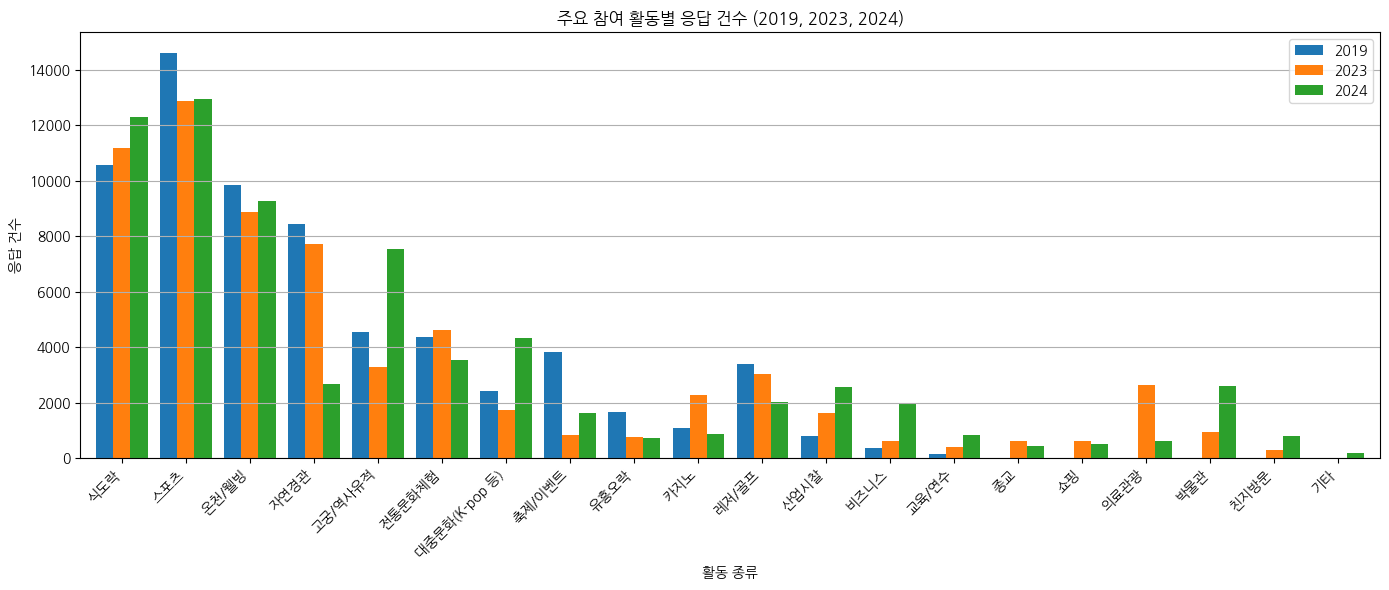

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 연도별 데이터셋과 항목 정의
participation_info = {
    '2019': {'df': df_2019, 'cols': [f'Q9_1A{i}' for i in range(1, 21)]},
    '2023': {'df': df_2023, 'cols': [f'Q8a{str(i).zfill(2)}' for i in range(1, 20)]},
    '2024': {'df': df_2024, 'cols': [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]},
}

# [2] 활동 코드별 이름 매핑 (예시 – 필요한 만큼 보완 가능)
activity_labels = {
    1: '식도락', 2: '스포츠', 3: '온천/웰빙', 4: '자연경관', 5: '고궁/역사유적',
    6: '전통문화체험', 7: '대중문화(K-pop 등)', 8: '축제/이벤트', 9: '유흥오락',
    10: '카지노', 11: '레저/골프', 12: '산업시찰', 13: '비즈니스',
    14: '교육/연수', 15: '종교', 16: '쇼핑', 17: '의료관광', 18: '박물관',
    19: '친지방문', 20: '기타'
}

# [3] 연도별 활동 건수 계산
participation_counts = {}

for year, info in participation_info.items():
    df = info['df']
    cols = info['cols']
    counts = pd.Series(dtype=int)

    for code in range(1, 21):  # 활동코드는 1~20
        counts[activity_labels.get(code, f'코드{code}')] = (df[cols] == code).sum().sum()

    participation_counts[year] = counts

# [4] 데이터프레임 정리 및 시각화
df_part = pd.DataFrame(participation_counts).fillna(0).astype(int)

df_part.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("주요 참여 활동별 응답 건수 (2019, 2023, 2024)")
plt.ylabel("응답 건수")
plt.xlabel("활동 종류")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 만족 활동별 건수 (2019, 2023, 2024)


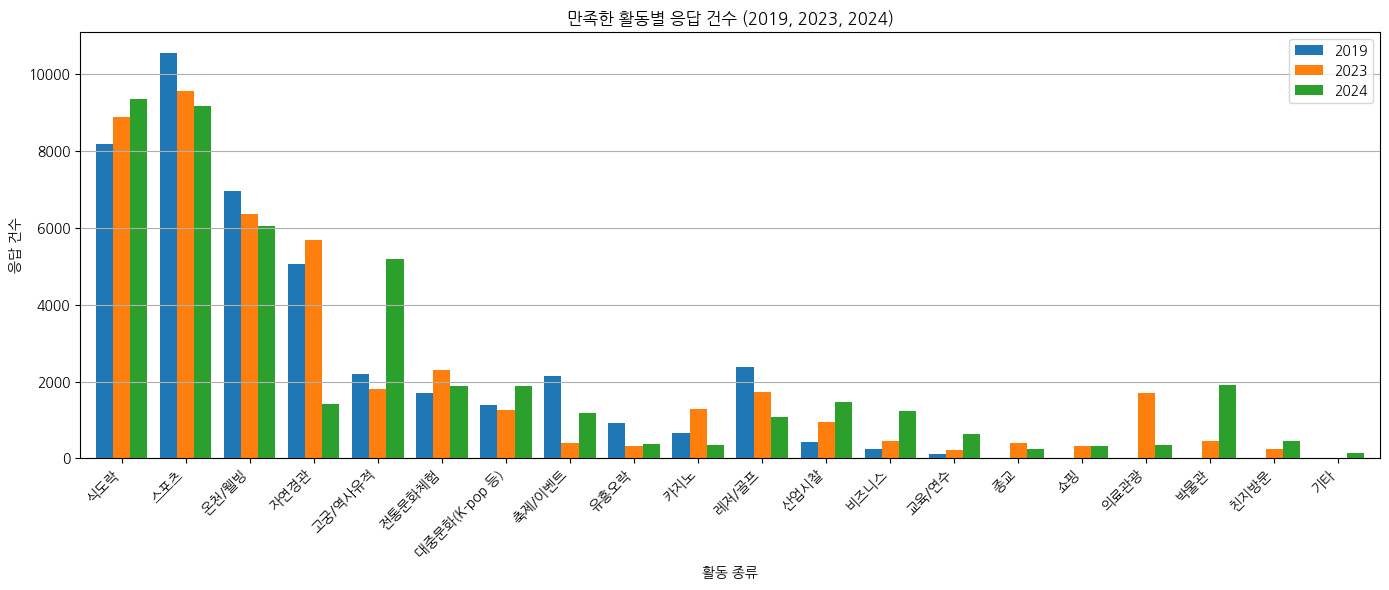

In [19]:
# [1] 연도별 만족 활동 항목 정의
satisfaction_info = {
    '2019': {'df': df_2019, 'cols': ['Q9_2A1', 'Q9_2A2', 'Q9_2A3']},
    '2023': {'df': df_2023, 'cols': ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']},
    '2024': {'df': df_2024, 'cols': ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']},
}

# [2] 연도별 만족 활동 건수 계산
satisfaction_counts = {}

for year, info in satisfaction_info.items():
    df = info['df']
    cols = info['cols']
    counts = pd.Series(dtype=int)

    for code in range(1, 21):  # 코드 1~20 기준
        counts[activity_labels.get(code, f'코드{code}')] = (df[cols] == code).sum().sum()

    satisfaction_counts[year] = counts

# [3] 시각화
df_sat = pd.DataFrame(satisfaction_counts).fillna(0).astype(int)

df_sat.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("만족한 활동별 응답 건수 (2019, 2023, 2024)")
plt.ylabel("응답 건수")
plt.xlabel("활동 종류")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. 대중문화 (K-pop 등)

- 참여 활동

    2019: 약 2,500건

    2023: 약 2,000건으로 소폭 감소

    2024: 약 4,000건 → 2019년 대비 약 60% 증가

- 만족 활동

    2019: 약 1,500건 수준

    2023: 증가 (약 1,800건)

    2024: 다시 소폭 감소 (약 1,600건)

- 분석

    K-pop 참여율은 꾸준히 확대 → Feel the Rhythm of Korea 등의 인지도 상승 캠페인 효과

    만족도는 상대적으로 정체 → 체험 콘텐츠 다양성, 깊이 부족 가능성



2. 전통문화체험

- 참여 활동

    2019: 약 4000건

    2023: 약 4700건으로 소폭 증가

    2024: 약 3800건 → 하지만 고궁/역사유적이 폭등

- 만족 활동

    2019: 약 1,700건

    2023: 증가 (약 2200건)

    2024: 다시 소폭 감소 (약 1,900건) → 50프로 정도 만족

    하지만 고궁/역사유적이 약 7500건 중 약 5200건 정도가 만족(약 70% 만족)

- 분석

  전통문화체험과는 별개로 '고궁/역사유적'은 폭발적 성장을 보였음.

  이는 아마도 정책적으로 전통문화 공간 콘텐츠 재구성 (예: 야간개장, AR 체험 등) 또는 문화재청/서울시의 협업 콘텐츠 확대 등의 영향일 수 있음.

  만족률이 70%를 넘는다는 점에서, 정적 관람 중심 전통문화가 이제는 '**경험 중심 콘텐츠**'로 진화한 사례로 볼 수 있음.

## [2024년] 전통문화체험과 고궁/역사유적 활동의 연계 여부에 따른 재방문의향

- 고궁 : 5 / 전통문화체험 : 6

- 주요 참여 활동 : Q8a01 ~ Q8a20

- 가장 만족한 활동 : Q8_1a1 ~ Q8_1a3


- 네가지로 분류

  - 고궁/역사유적만
  - 전통문화체험만
  - 둘 다 참여
  - 기타 (둘다 참여하지 않음)


In [10]:
import pandas as pd

# [1] 활동 코드 설정
code_traditional = 6  # 전통문화체험
code_palace = 5        # 고궁/역사유적

# [2] 주요 참여 활동 컬럼
participation_cols_2024 = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]

# [3] 재방문의향 컬럼
revisit_col_2024 = 'Q13'

# [4] 전통문화체험/고궁 여부 판별
is_traditional = df_2024[participation_cols_2024].isin([code_traditional]).any(axis=1)
is_palace = df_2024[participation_cols_2024].isin([code_palace]).any(axis=1)

# [5] 활동 그룹 분류
df_2024['activity_group'] = '기타'
df_2024.loc[is_traditional & ~is_palace, 'activity_group'] = '전통문화체험만'
df_2024.loc[~is_traditional & is_palace, 'activity_group'] = '고궁/역사유적만'
df_2024.loc[is_traditional & is_palace, 'activity_group'] = '둘 다 참여'


# [6] 그룹별 재방문 점수 및 비율 요약
summary_2024 = df_2024.groupby('activity_group')['Q13'].agg(
    재방문_평균점수='mean',
    재방문_4_5점_비율=lambda x: (x >= 4).mean()
)

print(summary_2024)

                재방문_평균점수  재방문_4_5점_비율
activity_group                       
고궁/역사유적만        4.511873     0.914908
기타              4.535381     0.928133
둘 다 참여          4.517623     0.897281
전통문화체험만         4.528233     0.905282


 -> 고궁/역사유적의 주요 활동과 만족 활동 건수는 증가했는데, 왜 만족 비율은 비슷할까?

 : 만족 비율(%)은 비슷해도, **모집단(응답자 수)이 다르다**

## 전통문화체험 vs 고궁/역사유적 참여 그룹 간의 참여자 특성(연령, 국가, 숙박기간) 비교

총 숙박기간	: 국내에서 실제 숙박한 일수 (예: 호텔, 민박 등)

관광활동과 직접 연관됨 (선택)

총 체류기간 : 	국내에 머문 전체 기간 (도착~출국)

공항 체류 포함 가능성 있음


- 연령 : D_AGE
- 나라 : D_NAT
- 총 숙박기간 : M박HAP

In [12]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

In [14]:
# [1] 비교 대상 컬럼
columns_to_compare = ['D_AGE', '국가명', 'M박HAP']  # 나이, 국가, 체류일수 (예시 변수명)

# [2] 그룹화된 activity_group 기반으로 통계 요약
summary = df_2024.groupby('activity_group')[columns_to_compare].agg({
    'D_AGE': ['mean', 'median'],
    'M박HAP': ['mean', 'median'],
    '국가명': lambda x: x.value_counts().head(3).to_dict()  # 상위 3개 국가
})

# [3] 보기 좋게 컬럼 정리
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary.reset_index(inplace=True)

summary

,activity_group,D_AGE_mean,D_AGE_median,M박HAP_mean,M박HAP_median,국가명_<lambda>
0,고궁/역사유적만,3.307168,3.0,9.390501,5.0,"{'싱가포르': 399, '홍콩': 373, '일본': 365}"
1,기타,3.355283,3.0,7.555405,4.0,"{'일본': 1694, '중국': 1504, '홍콩': 661}"
2,둘 다 참여,3.122860,3.0,9.621349,6.0,"{'싱가포르': 304, '기타': 226, '프랑스': 219}"
3,전통문화체험만,3.125683,3.0,8.621129,5.0,"{'홍콩': 81, '일본': 61, '싱가포르': 40}"


정말 30대가 주를 이루는 것인지 실제 분포 확인

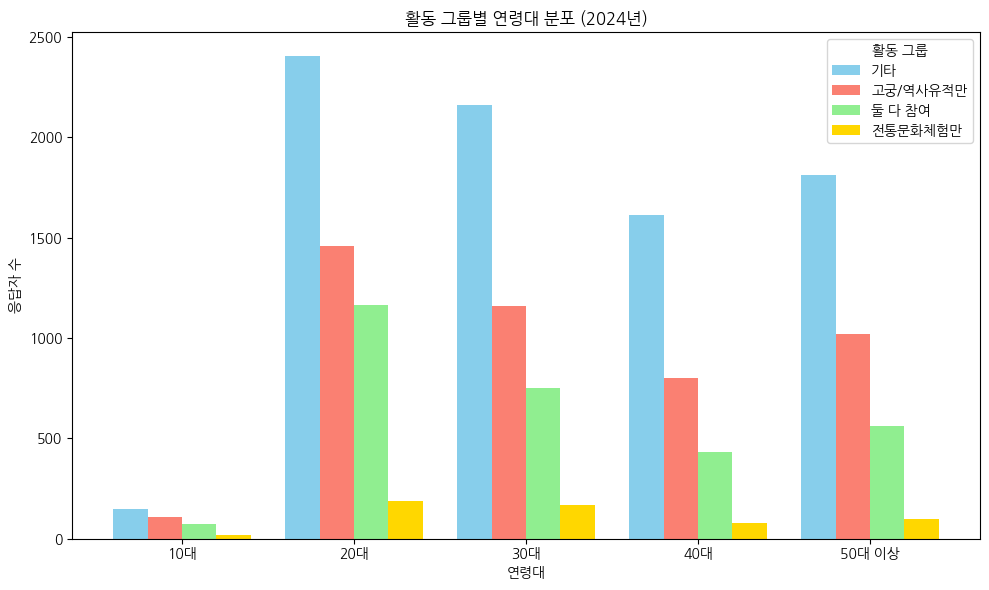

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 연령대 구간 설정 함수
def map_age_group(x):
    if x == 1:
        return '10대'
    elif x == 2:
        return '20대'
    elif x == 3:
        return '30대'
    elif x == 4:
        return '40대'
    else:
        return '50대 이상'

# [2] 연령대 컬럼 생성
df_2024['age_group'] = df_2024['D_AGE'].apply(map_age_group)

# [3] 히스토그램 시각화
plt.figure(figsize=(10, 6))

activity_groups = df_2024['activity_group'].unique()
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

for i, group in enumerate(activity_groups):
    subset = df_2024[df_2024['activity_group'] == group]
    age_counts = subset['age_group'].value_counts().sort_index()
    plt.bar(
        [x + i*0.2 for x in range(len(age_counts))],
        age_counts.values,
        width=0.2,
        label=group,
        color=colors[i % len(colors)]
    )

plt.xticks([x + 0.3 for x in range(len(age_counts))], age_counts.index)
plt.xlabel('연령대')
plt.ylabel('응답자 수')
plt.title('활동 그룹별 연령대 분포 (2024년)')
plt.legend(title='활동 그룹')
plt.tight_layout()
plt.show()

**결론**

‘고궁/역사유적만’ 참여자의 연령층은 전통문화보다 다양하고, 상대적으로 중장년층까지 분포.

주로 참여자가 많은 그룹은 20대에서 30대지만 전반적으로 고르게 분포되어있다

| 구분                  | 분석 내용                                                                                                       |
| ------------------- | ----------------------------------------------------------------------------------------------------------- |
| **기타 그룹 비율이 높은 이유** | "고궁/역사유적"과 "전통문화체험" 둘 다 하지 않은 **모든 활동군이 포함된 그룹**이기 때문에 자연스럽게 **응답 수가 많음**.                                  |
| **주요 연령층**          | `20대`와 `30대`에서 전체적으로 **가장 많은 참여자 수**를 보임. 특히 `기타`와 `고궁/역사유적` 그룹에서 두드러짐.                                     |
| **40대 이상**          | 모든 그룹에서 **일정 비율 이상 유지**, 완전히 배제되지 않음.                                                                       |
| **10대**             | 전체 참여자 중 **비중은 적지만 존재**, 특히 전통문화 관련 참여는 매우 적음.                                                              |
| **전체적으로 볼 때**       | 20대, 30대를 중심으로 **참여자가 가장 많지만**, **40대 이상도 꾸준히 존재하며, 연령 분포가 완전히 편중되어 있지는 않음**. 즉, **‘고르게 분포되어 있다’고 볼 수 있음.** |


# 주제 초안

[주제명]

"정적인 관람에서 경험형 콘텐츠로: 고궁·역사유적지의 진화와 외래관광객 유입 확대 가능성 분석"

[가설]

가설 1: 고궁 콘텐츠 변화(야간개장·AR 체험 등) 이후, 참여율·만족도·재방문의향이 유의하게 증가했을 것이다.

가설 2: 해당 정책 효과는 특정 타겟 국가/연령에 더 강하게 작용했을 수 있다.

가설 3: 문화 콘텐츠 수요 증대가 관광활성화에 기여하고 있으며, 그 중심에는 고궁 콘텐츠가 있다.

**고궁 관련 정책 효과 분석 (다음 단계)**

① 정책 추출

주요 이벤트:

경복궁 야간개장 (상·하반기 시즌별)

덕수궁 돌담길 AR 체험 (2023년 본격 시행)

문화재 야행 / 미디어 파사드 활용 등



② 정책 시계열화

이벤트 시행 시점 기준으로,

고궁 관련 참여율·만족도 변화 추이 시각화

만족도 & 재방문 의향 간 변화 점 확인



③ 정책 대상 비교

‘참여자 국적별·연령별’ 차이 → 어떤 국가가 더 반응했는가?



④ 정책 전환점 시그널 분석

Before/After 정책 → 시차 기반 비교 분석

ex) AR체험 전후 만족도 / 재방문의향 비교


3. 타겟 설정 및 세분화 전략
① 주요 타겟 제안

| 분류 | 내용                                                 |
| -- | -------------------------------------------------- |
| 국가 | 🇸🇬 싱가포르, 🇭🇰 홍콩, 🇯🇵 일본 *(고궁 만족 비율 높은 응답자 다수)* |
| 연령 | 20\~30대 *(참여율/만족도 균형 + 재방문 의향 높음)*                 |


② 정책 효과 대상 선별

정책별로 특정 국가/연령을 타겟팅한 효과가 있었는지 분석

타겟 국가별 방문 동기에서 역사유적 비중도 체크

